In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot
from datetime import datetime

<Figure size 800x800 with 0 Axes>

In [52]:
data=pd.read_csv("Data.csv")
data.head(3)
data.drop("Country_Code",inplace=True,axis=1)
df=data.copy()
df.head(3)

,Date,Article_ID,Sold_Units
0,20170817,1132,1
1,20170818,1132,1
2,20170821,1132,1


In [53]:
df.drop("Article_ID",inplace=True,axis=1)
df.isna().sum()


Date          0
Sold_Units    0
dtype: int64

In [54]:
# Convert Date into Datetime format
df['Date'] =  pd.to_datetime(df['Date'], format='%Y%m%d')
df.head(3)
df.set_index('Date',inplace=True)
df.head(3)

,Sold_Units
Date,
2017-08-17,1
2017-08-18,1
2017-08-21,1


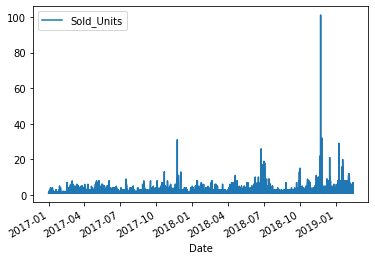

In [55]:

df.plot()

In [56]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sold_Units'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [57]:
adfuller_test(df['Sold_Units'])

ADF Test Statistic : -15.219818096183563
p-value : 5.505206382735455e-28
#Lags Used : 9
Number of Observations Used : 4839
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


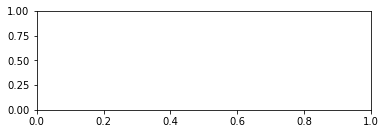

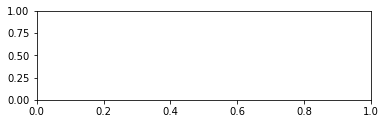

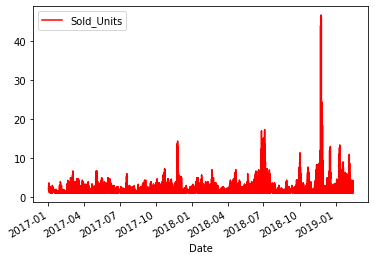

In [61]:
from pandas import Series
from matplotlib import pyplot
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
#pyplot.figure(1)
pyplot.subplot(212)
df.plot(color="blue")
pyplot.subplot(212)
rolling_mean.plot(color='red')
pyplot.show()

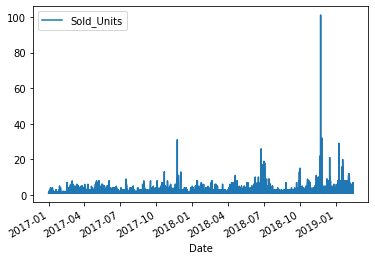

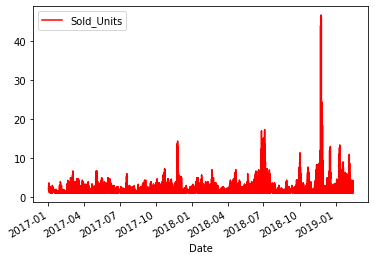

In [60]:
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
#print(rolling_mean.head(10))
# plot original and transformed dataset
df.plot(kind="line")
rolling_mean.plot(color='red')
pyplot.show()

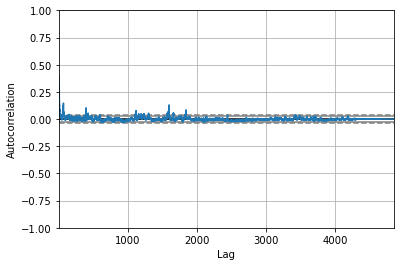

In [24]:
#!pip install pandas.plotting
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sold_Units'])
plt.show()

# 11 different classical time series forecasting methods; they are:

    Autoregression (AR)
    Moving Average (MA)
    Autoregressive Moving Average (ARMA)
    Autoregressive Integrated Moving Average (ARIMA)
    Seasonal Autoregressive Integrated Moving-Average (SARIMA)
    Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
    Vector Autoregression (VAR)
    Vector Autoregression Moving-Average (VARMA)
    Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
    Simple Exponential Smoothing (SES)
    Holt Winter’s Exponential Smoothing (HWES)


In [32]:

#from random import random
#data = [x + random() for x in range(1, 100)]
data=df
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(data, lags=3)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

4849    1.398566
dtype: float64


C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [34]:
# MA example
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

4849    1.712893
dtype: float64


C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

In [36]:

# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived datase
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.57647038]


In [37]:

# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[0.48293898]


In [39]:

# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

ValueError: Seasonal periodicity must be greater than 1.

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
#Exogenous variables are also called covariates and can be thought of as parallel input sequences 
#that have observations at the same time steps as the original series
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]
# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
print(yhat)

[100.59905645]


C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
from statsmodels.tsa.vector_ar.var_model import VAR
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

ValueError: Only gave one variable to VAR

In [42]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.41179182 0.85315626]]


C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.42006485 0.83797088]]


C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.51616367]


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.51616367]


C:\Users\spradhan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
